In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
from patsy import dmatrices

In [2]:
df=pd.read_csv(r'C:\Users\khana\Desktop\IBM Attrition Data.csv')
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


<AxesSubplot:xlabel='MaritalStatus'>

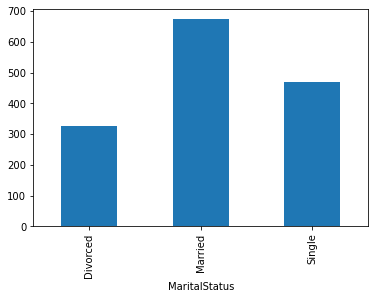

In [3]:
df.groupby('MaritalStatus')['Age'].count().plot(kind='bar')

Text(0.5, 1.0, 'Education')

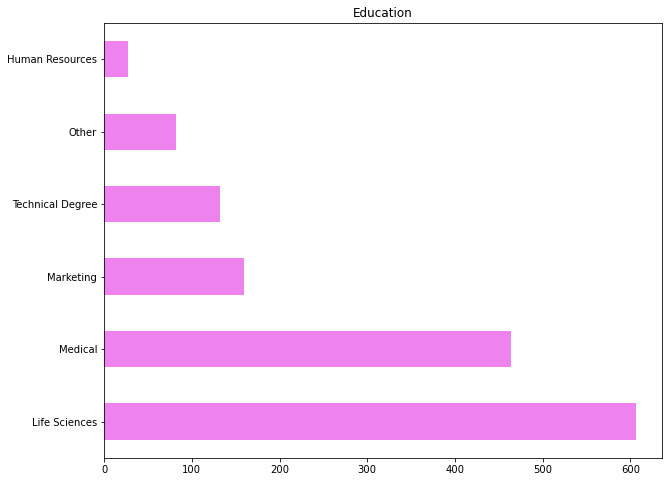

In [4]:
plt.figure(figsize=(10,8))
df['EducationField'].value_counts().plot(kind='barh',color='violet')
plt.title('Education')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [6]:
df['Attrition'].dtypes

dtype('O')

In [7]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [8]:
df['Attrition'].replace('Yes',1,inplace=True)
df['Attrition'].replace('No',0,inplace=True)

In [9]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [10]:
df['MaritalStatus'].replace('Single',1,inplace=True)
df['MaritalStatus'].replace('Married',0,inplace=True)
df['MaritalStatus'].replace('Divorced',0,inplace=True)

In [11]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [12]:
df['EducationField'].replace('Life Sciences',0,inplace=True)
df['EducationField'].replace('Medical',1,inplace=True)
df['EducationField'].replace('Marketing',2,inplace=True)
df['EducationField'].replace('Technical Degree',3,inplace=True)
df['EducationField'].replace('Other',4,inplace=True)
df['EducationField'].replace('Human Resources',5,inplace=True)

In [13]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [14]:
df['Department'].replace('Research & Development',0,inplace=True)
df['Department'].replace('Sales',1,inplace=True)
df['Department'].replace('Human Resources',2,inplace=True)

In [15]:
df.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [16]:
##figsize=(20,10)
##sns.heatmap(df[['MaritalStatus','Attrition']],annot=True)

In [17]:
df2=df

In [18]:
df2

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,1,1,2,0,2,4,1,5993,8,1,6
1,49,0,0,8,1,0,3,2,0,5130,1,3,10
2,37,1,0,2,2,4,4,3,1,2090,6,3,0
3,33,0,0,3,4,0,4,3,0,2909,1,3,8
4,27,0,0,2,1,1,1,2,0,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,0,23,2,1,3,4,0,2571,4,3,5
1466,39,0,0,6,1,1,4,1,0,9991,4,3,7
1467,27,0,0,4,3,0,2,2,0,6142,1,3,6
1468,49,0,1,2,3,1,4,2,0,5390,2,2,9


In [19]:
x=df2.select_dtypes(include=['int64'])

In [22]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [25]:
y=df2['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [33]:
y, x = dmatrices('Attrition ~ Age + Department + DistanceFromHome + Education + EducationField + YearsAtCompany',
                  df2, return_type="dataframe")
x.columns

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')

In [34]:
x

,Intercept,Age,Department,DistanceFromHome,Education,EducationField,YearsAtCompany
0,1.0,41.0,1.0,1.0,2.0,0.0,6.0
1,1.0,49.0,0.0,8.0,1.0,0.0,10.0
2,1.0,37.0,0.0,2.0,2.0,4.0,0.0
3,1.0,33.0,0.0,3.0,4.0,0.0,8.0
4,1.0,27.0,0.0,2.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...
1465,1.0,36.0,0.0,23.0,2.0,1.0,5.0
1466,1.0,39.0,0.0,6.0,1.0,1.0,7.0
1467,1.0,27.0,0.0,4.0,3.0,0.0,6.0
1468,1.0,49.0,1.0,2.0,3.0,1.0,9.0


In [36]:
y=np.ravel(y)
y

array([1., 0., 1., ..., 0., 0., 0.])